# 4.1 Tworzenie lasu z drzew decyzyjnych: bagging

### Bootstrap
Metoda **bootstrap** jest dość użyteczna, jeśli chcemy obliczyć pewną wielkość dla całej populacji na podstawie jej próbki. Załóżmy, że mamy ogromną kolekcję liczb i chcielibyśmy odnaleźć ich średnią, jednak z powodów wydajnościowych nie możemy po prostu zsumować wszystkich wartości i podzielić ich przez liczbę. Podstawową strategią w takim wypadku może być np. wybranie jednej próbki danych o rozmiarze $N$ i policzenie średniej dla tych elementów.

In [16]:
import numpy as np

In [17]:
numbers = np.random.normal(loc=100, scale=50, size=100000000)
numbers

array([ 35.09836426, 164.51563614, 175.07047245, ..., 165.69229963,
        50.42160449, 133.13022028])

In [18]:
N = 100

In [19]:
np.random.seed(61925235)
numbers_sample = np.random.choice(numbers, N)
numbers_sample.mean()

94.75645437394567

Takie postępowanie jest podatne na błędy, szczególnie jeśli $ N $ będzie miało niewielką wartość w stosunku do rozmiaru całego zbioru danych jaki posiadamy. Procedura *bootstrap* pozwala nam ulepszyć nasze estymacje poprzez wielokrotne próbkowanie z powtórzeniami, a następnie liczenie średniej z wyników uzyskanych dla poszczególnych próbek prowadzi nas do wyjściowego wyniku.

In [23]:
np.random.seed(61925235)
sample_means = [np.random.choice(numbers, N, replace=True).mean() for _ in range(100)]

In [24]:
import matplotlib.pyplot as plt

(array([ 1.,  3.,  6.,  7., 11.,  9., 10., 10., 15., 11.,  3.,  8.,  4.,
         0.,  2.]),
 array([ 88.57819451,  90.09997671,  91.6217589 ,  93.1435411 ,
         94.66532329,  96.18710548,  97.70888768,  99.23066987,
        100.75245207, 102.27423426, 103.79601646, 105.31779865,
        106.83958085, 108.36136304, 109.88314524, 111.40492743]),
 <BarContainer object of 15 artists>)

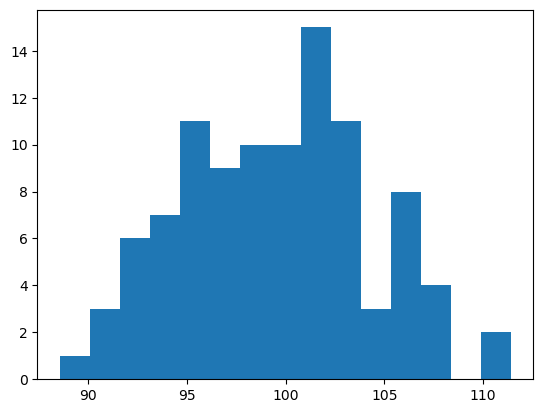

In [25]:
plt.hist(sample_means, bins=15)

In [26]:
np.mean(sample_means)

99.52735876847963

Zobaczmy jak to się ma do wyniku średniej z całego zbioru 

In [27]:
numbers.mean()

99.99904692042831

In [28]:
np.random.seed(61925235)
np.mean([np.random.choice(numbers, N, 
                          replace=True).mean() 
         for _ in range(10000)])

100.04416180051635

In [29]:
for i in np.logspace(1, 5, num=25):
    print(i)

10.0
14.677992676220699
21.544346900318832
31.622776601683793
46.41588833612777
68.12920690579611
100.0
146.7799267622069
215.44346900318823
316.22776601683796
464.15888336127773
681.2920690579608
1000.0
1467.799267622069
2154.4346900318824
3162.2776601683795
4641.588833612777
6812.920690579608
10000.0
14677.992676220676
21544.346900318822
31622.776601683792
46415.888336127726
68129.20690579608
100000.0


In [30]:
means = []
for i in np.logspace(1, 5, num=25):
    np.random.seed(61925235)
    bootstrap_mean = np.mean([
        np.random.choice(numbers, N, 
                         replace=True).mean() 
        for _ in range(int(i))
    ])
    means.append(bootstrap_mean)

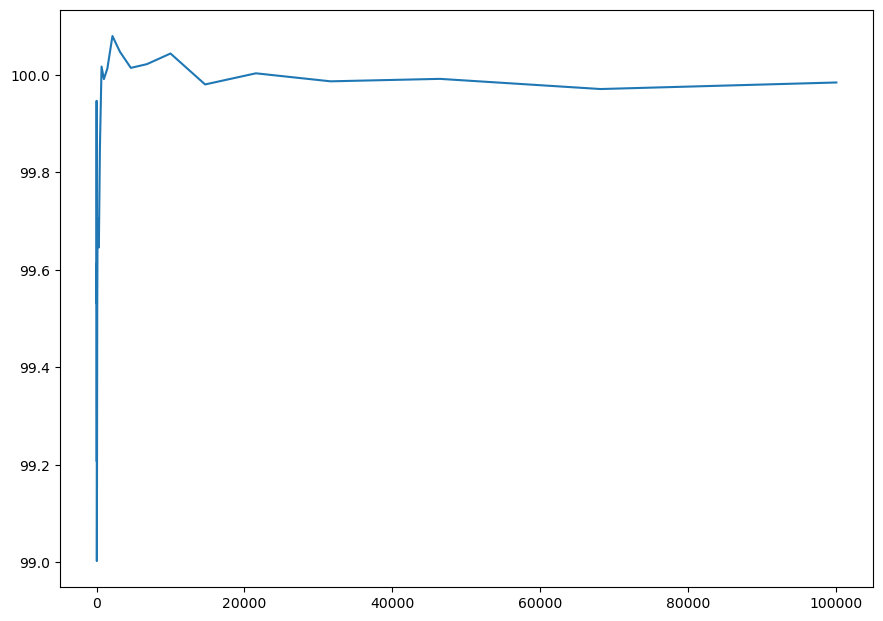

In [31]:
plt.figure(figsize=(10.5, 7.5))
plt.plot(np.logspace(1, 5, num=25), means)

Jak ma się to jednak do Machine Learningu?

### Bootstrap a Machine Learning

Nic nie stoi na przeszkodzie, aby procedurę *bootstrap* zastosować również w przypadku naszych modeli. Mamy zbiór danych, który możemy próbkować, a uśrednianie wyników także nie będzie problemem. **Bagging** to wykorzystanie metody *bootstrap* dla ML i bierze swoją nazwę od **B**ootstrap **agg**regat**ing**.

Rozpatrywaliśmy problemy klasyfikacji oraz regresji. W pierwszym przypadku uśrednianie wyników sprowadzi się do przeprowadzenia procedury głosowania, którą już znamy, ponieważ jest stosowana podczas wyboru klasy w drzewach decyzyjnych. Najbardziej naiwną wersją metody opartą o *bootstraping* jest metoda zaimplementowana w scikit-learn w klasach `BaggingClassifier` oraz `BaggingRegressor`. Nie będziemy jej bezpośrednio testować, ale w skrócie przeprowadzają one dokładnie tę procedurę, którą omówiliśmy.